In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras import layers, models


In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
import seaborn as sns


In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)

In [ ]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_split=0.2, verbose=1)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 272s 424ms/step - accuracy: 0.3916 - loss: 1.9525 - val_accuracy: 0.4673 - val_loss: 1.5458
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 328s 435ms/step - accuracy: 0.6105 - loss: 1.0973 - val_accuracy: 0.6488 - val_loss: 0.9956
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 308s 413ms/step - accuracy: 0.6817 - loss: 0.9110 - val_accuracy: 0.6726 - val_loss: 0.9406
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 267s 422ms/step - accuracy: 0.7182 - loss: 0.8009 - val_accuracy: 0.6920 - val_loss: 0.9098
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 413ms/step - accuracy: 0.7423 - loss: 0.7256 - val_accuracy: 0.7329 - val_loss: 0.7539
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 421ms/step - accuracy: 0.7665 - loss: 0.6621 - val_accuracy: 0.7348 - val_loss: 0.7823
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 423ms/step - accuracy: 0.7878 - loss: 0.6057 - val_accuracy: 0.7512 - val_loss: 0.7324
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 425ms/step - accuracy: 0.8107 -

In [13]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


Test Accuracy: 0.80
Test Loss: 0.67


In [14]:
# Generate predictions for confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step


In [15]:
# Generate classification report
class_report = classification_report(y_test, y_pred_classes, target_names=class_names)

In [16]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

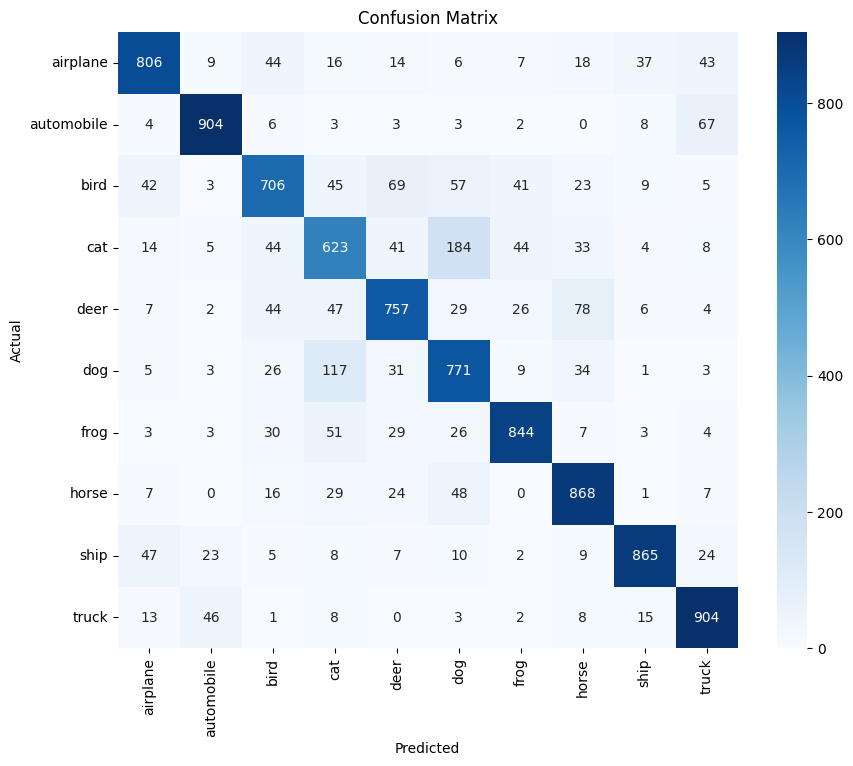

In [17]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

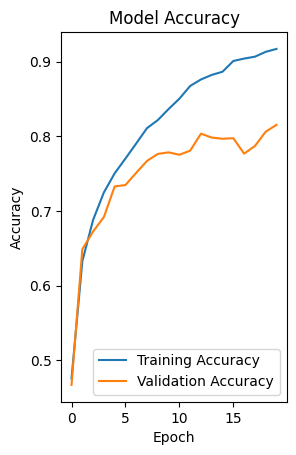

In [19]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

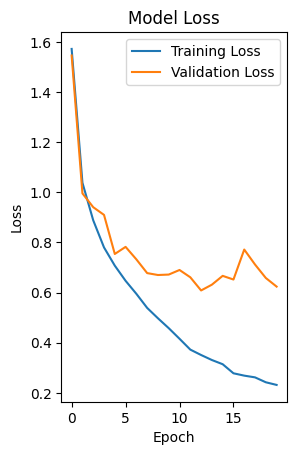

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [22]:
# Print classification report
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.81      0.83      1000
  automobile       0.91      0.90      0.90      1000
        bird       0.77      0.71      0.73      1000
         cat       0.66      0.62      0.64      1000
        deer       0.78      0.76      0.77      1000
         dog       0.68      0.77      0.72      1000
        frog       0.86      0.84      0.85      1000
       horse       0.81      0.87      0.84      1000
        ship       0.91      0.86      0.89      1000
       truck       0.85      0.90      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



In [23]:
# Save metrics to a text file
with open('model_metrics.txt', 'w') as f:
    f.write(f"Test Accuracy: {test_accuracy:.2f}\n")
    f.write(f"Test Loss: {test_loss:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(class_report)

In [24]:
# Example: Predict on a single test image
sample_idx = 0
sample_image = x_test[sample_idx:sample_idx+1]
sample_label = y_test[sample_idx][0]
pred_label = np.argmax(model.predict(sample_image), axis=1)[0]
print(f"\nExample Prediction: True Label = {class_names[sample_label]}, "
      f"Predicted Label = {class_names[pred_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Example Prediction: True Label = cat, Predicted Label = cat
